In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm
import os
from skimage.measure import perimeter as measure_perimeter

# Perimeter test

In [2]:
# Test perimeter term function
def has_isolated_pixel(grid, value, periodic=False):
    mask = (grid == value)

    if periodic:
        m = np.pad(mask, 1, mode="wrap")
    else:
        m = np.pad(mask, 1, mode="constant", constant_values=False)

    isolated = (
        m[1:-1, 1:-1] &          # cell itself
        ~m[:-2, 1:-1] &          # up
        ~m[2:, 1:-1] &           # down
        ~m[1:-1, :-2] &          # left
        ~m[1:-1, 2:]             # right
    )

    return np.any(isolated)

def perimeter_term(point_value,
                    source_point_value,
                    target_point_index,
                    grid, 
                    new: bool):
    """
    Calculate the perimeter term.
    """
        
    def compute_perimeter(grid, value):
        """
        Compute perimeter of all pixels with a given value,
        It counts one pixel as perimeter zero. 
        """
        # Binary mask for this cell type
        mask = (grid == value)

        mask_wrapped = np.pad(mask, pad_width=1, mode='constant', constant_values=0)
        
        isolated = (
                    mask_wrapped[1:-1, 1:-1] &          # cell itself
                    ~mask_wrapped[:-2, 1:-1] &          # up
                    ~mask_wrapped[2:, 1:-1] &           # down
                    ~mask_wrapped[1:-1, :-2] &          # left
                    ~mask_wrapped[1:-1, 2:]  &           # right
                    ~mask_wrapped[ :-2, :-2] &        # up-left
                    ~mask_wrapped[ :-2, 2:] &         # up-right
                    ~mask_wrapped[ 2:, :-2] &         # down-left
                    ~mask_wrapped[ 2:, 2:]             # down-right
                )  # moore neighborhood
        # Label connected components (in case cell_value appears multiple times)
        perimeter = measure_perimeter(mask_wrapped, neighborhood=8)
        return perimeter, np.any(isolated)  # Returns perimeter value and if there are isolated pixels
    
    grid_copy = grid.copy()
    if new: # Assume we are changing the target point to the source point
        grid_copy[target_point_index] = source_point_value
    
    P, iso = compute_perimeter(grid_copy, point_value)
    if iso:
        print("Warning: Isolated pixel detected for value", point_value)
    return P



In [5]:
grid = np.array([[0, 1, 1, 1, 1],
                 [0, 1, 2, 1, 1],
                 [2, 2, 1, 1, 1],
                 [2, 2, 2, 0, 0],
                 [2, 2, 2, 0, 0]])


new = False
target_point_index = (2, 1)
target_point_index_alt = (0, 3)
source_point_value = 1
source_point_value_alt = 2

In [6]:
# Before the change
P_1_before = perimeter_term(1, source_point_value, target_point_index, grid, new=False)
P_2_before = perimeter_term(2, source_point_value, target_point_index, grid, new=False)
print(f"Perimeter of cell type 1 before change: {P_1_before}")
print(f"Perimeter of cell type 2 before change: {P_2_before}")

print("----")
# After the change
P_1_after = perimeter_term(1, source_point_value, target_point_index, grid, new=True)
P_2_after = perimeter_term(2, source_point_value, target_point_index, grid, new=True)
print(f"Perimeter of cell type 1 after change: {P_1_after}")
print(f"Perimeter of cell type 2 after change: {P_2_after}")
delta_P = (P_1_after - P_1_before + P_2_after - P_2_before)
print(f"Change in perimeter: {delta_P}")


# Alternative target point
P_1_after_alt = perimeter_term(1, source_point_value_alt, target_point_index_alt, grid, new=True)
P_2_after_alt = perimeter_term(2, source_point_value_alt, target_point_index_alt, grid, new=True)
print("----")
print(f"Perimeter of cell type 1 after change (alt): {P_1_after_alt}")
print(f"Perimeter of cell type 2 after change (alt): {P_2_after_alt}")
delta_P_alt = (P_1_after_alt - P_1_before + P_2_after_alt - P_2_before)
print(f"Change in perimeter: {delta_P_alt}")

Perimeter of cell type 1 before change: 9.414213562373096
Perimeter of cell type 2 before change: 6.0
----
Perimeter of cell type 1 after change: 10.0
Perimeter of cell type 2 after change: 6.207106781186548
Change in perimeter: 0.7928932188134521
----
Perimeter of cell type 1 after change (alt): 8.82842712474619
Perimeter of cell type 2 after change (alt): 7.414213562373095
Change in perimeter: 0.828427124746189


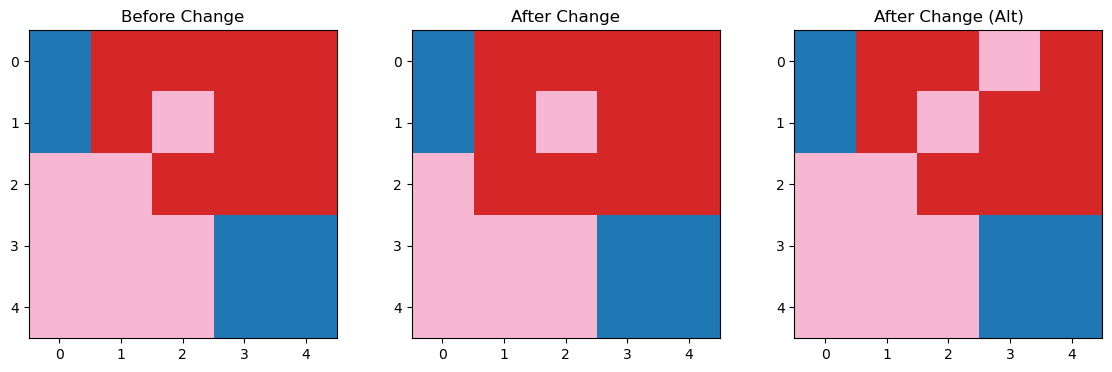

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].imshow(grid, cmap='tab20', vmin=0, vmax=3)
grid_modified = grid.copy()
grid_modified[target_point_index] = source_point_value
ax[1].imshow(grid_modified, cmap='tab20', vmin=0, vmax=3)
grid_modified_alt = grid.copy()
grid_modified_alt[target_point_index_alt] = source_point_value_alt
ax[2].imshow(grid_modified_alt, cmap='tab20', vmin=0, vmax=3)

ax[0].set_title('Before Change')
ax[1].set_title('After Change')
ax[2].set_title('After Change (Alt)')
plt.show()